(100, 2)


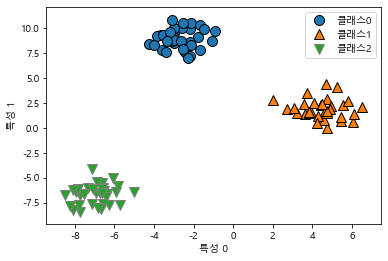

In [12]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')

matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)

print(X.shape)

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스0", "클래스1", "클래스2"])

# 세개의 클래스를 가진 2차원 데이터셋


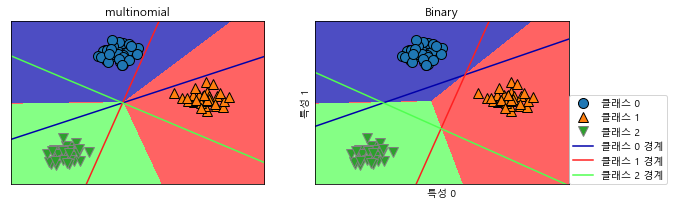

In [25]:
from sklearn.linear_model import LogisticRegression

logr  = LogisticRegression().fit(X,y)


fig, axes = plt.subplots(1,2,figsize=(10,3))

logr_Binary = LogisticRegression(multi_class='ovr').fit(X,y) 
# 멀티 클래스를 ovr을 사용한다 ( Binary를 사용한다는 뜻.)
logr  = LogisticRegression().fit(X,y)
 # multi_class는 디폴트 값으로 multinomial사용함

mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=axes[0])
mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=axes[1])
mglearn.plots.plot_2d_classification(logr, X,  fill=True, alpha=.7, ax=axes[0])
mglearn.plots.plot_2d_classification(logr_Binary, X,  fill=True, alpha=.7, ax=axes[1])
line = np.linspace(-15,15)

axes[0].set_title("multinomial")
axes[1].set_title("Binary")
for i, color in zip(range(len(logr.coef_)), mglearn.cm3.colors):
    axes[0].plot(line, -(line*logr.coef_[i][0] + logr.intercept_[i])/logr.coef_[i][1], c = color )
    axes[1].plot(line, -(line*logr_Binary.coef_[i][0] + logr_Binary.intercept_[i])/logr_Binary.coef_[i][1], c = color)

plt.xlabel("특성 0")
plt.ylabel("특성 1")

plt.legend(["클래스 0", "클래스 1", "클래스 2", '클래스 0 경계'
           , '클래스 1 경계' , '클래스 2 경계'], loc=(1,0))

# 교수님의 ppt와 동일하게 1번 그림은 multy class를 이용한 모델에 대해 선으로 분류 하였고
# 2번 그림은 binary Class로 분류된 모델이다
    

In [37]:
# 가우시안 NB

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_datasets = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_datasets['data'],iris_datasets['target'],random_state=0)

classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors/y_test.shape[0]

print(accuracy)
print(X_test.shape[0],(y_test != y_pred).sum())

X_train, X_test, y_train, y_test = train_test_split(iris_datasets['data'],iris_datasets['target'],random_state=0,test_size = 0.4)

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors/y_test.shape[0]

print("\nsize = 0.4")
print(accuracy)
print(X_test.shape[0],(y_test != y_pred).sum())

# 테스트 사이즈에 따라 달라지는 점을 확인 가능함.,

1.0
38 0

size = 0.4
0.9333333333333333
60 4


In [77]:
# 결정 트리

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.tree import export_graphviz
X,y = make_moons(n_samples = 100,  noise = 0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

print("\n깊이 제한 =4")
tree = DecisionTreeClassifier(max_depth=4 ,random_state=0)
tree.fit(X_train,y_train)
print("훈련 정확도  : {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 정확도  : {:.3f}".format(tree.score(X_test,y_test)))

print("일반 트리")
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 정확도  : {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 정확도  : {:.3f}".format(tree.score(X_test,y_test)))
# 깊이를 제한해 줌에 따라 정확도는 떨어졌으나 속도는 올라간다.


깊이 제한 =4
훈련 정확도  : 0.933
테스트 정확도  : 0.800
일반 트리
훈련 정확도  : 1.000
테스트 정확도  : 0.840


In [68]:
!pip install graphviz
# graphviz설치


In [69]:
# 암데이터 결정트리 출력 import는 위의 구문에서 했음
###
import graphviz 
with open("tree.dot", encoding='UTF8') as f:dot_graph = f.read()
display(graphviz.Source(dot_graph))

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

export_graphviz(tree,out_file="tree.dot",class_name=["악성","양성"],feature_names=cancer.feature_names,impurity=False, filled=True)

## 인터넷에 나온대로 했는데 msi가 뭔지 잘 모르겠습니다
# 환경 변수까지 세팅하고 아래 사이트에서도 조회를 해봤는데 잘 안되어서 포기했습니다..
#[https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software](https://bobswift.atlassian.net/wiki/spaces/GVIZ/pages/20971549/How+to+install+Graphviz+software)

FileNotFoundError: [Errno 2] No such file or directory: 'tree.dot'

In [81]:
print("특성 중요도 \n{}".format(tree.feature_importances_))
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)
# 이후 오류가 계속 떠서 강의 만 시청했습니다.

특성 중요도 
[0.5994228 0.4005772]
Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH